In [1]:
from hil_control.hw_rev4_dock_undock import HwRev4DockUndock, pcu
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import datetime

In [2]:
test = HwRev4DockUndock()

In [3]:
pcu.cmd_dock()
pcu.cmd_power_hdd_on()

In [4]:
test.prepare()

umount: /dev/sdc1: not mounted.
40+0 records in
40+0 records out
419430400 bytes (419 MB, 400 MiB) copied, 0,844615 s, 497 MB/s


In [36]:
test.run(iterations=10)

cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/home/max/Desktop/mntdir/big_dummy_file': No such file or directory
cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/home/max/Desktop/mntdir/big_dummy_file': No such file or directory
cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/home/max/Desktop/mntdir/big_dummy_file': No such file or directory
cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/home/max/Desktop/mntdir/big_dummy_file': No such file or directory
cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/home/max/Desktop/mntdir/big_dummy_file': No such file or directory
cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/home/max/Desktop/mntdir/big_dummy_file': No such file or directory
cp: cannot stat '/home/max/dummyfile': No such file or directory
rm: cannot remove '/hom

In [37]:
df = test.df
results = test.results

In [7]:
def plot_iteration(results: list, iteration: int):
    fig, (ax0, ax1) = plt.subplots(2)
    ax0.plot(results[iteration]["dock_currents"])
    ax0.set_title(f"docking current. Result: {results[iteration]['dockingstate_after_docking']}")
    ax1.plot(results[iteration]["undock_currents"])
    ax1.set_title(f"undocking current. Result: {results[iteration]['dockingstate_after_undocking']}")
    plt.suptitle(f"data for iteration {iteration}")
    plt.tight_layout()

In [42]:
def mean(l):
    return sum(l)/len(l)

def plot_stats(results: list):
    fig, (ax0, ax1) = plt.subplots(2)    
    ax0.plot([r["datatransfer_rate_mb_per_s"] for r in results], label="Datatransfer-Rate")
    ax0.set_title("Datatransfer Rate")
    ax0.set_xlabel("Iteration")
    ax0.set_ylabel("MB/s")
    average_docking_currents = [mean(result["dock_currents"]) for result in results]
    average_undocking_currents = [mean(result["undock_currents"]) for result in results]
    ax1.plot(average_docking_currents, label="docking")
    ax1.plot(average_undocking_currents, label="undocking")
    ax1.legend()
    ax1.set_title("Average Current Draw")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("digits")
    plt.tight_layout()

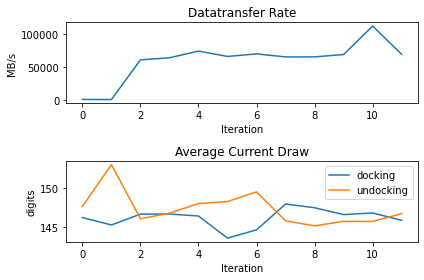

In [43]:
plot_stats(results)

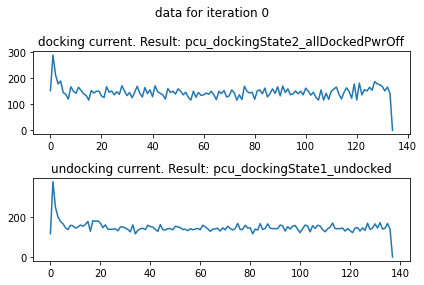

In [8]:
plot_iteration(results, 0)

In [22]:
with open(f'results_{datetime.now().isoformat()}.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(results, file)

In [4]:
from datetime import datetime
     

'2023-09-21 21-04'

In [10]:
hil.pcu.get_currentlog()

calling pcu with get currentlog


[297,
 232,
 190,
 149,
 153,
 144,
 153,
 143,
 161,
 146,
 148,
 124,
 155,
 159,
 168,
 162,
 176,
 183,
 175,
 144,
 153,
 133,
 154,
 146,
 141,
 147,
 129,
 135,
 146,
 154,
 141,
 148,
 138,
 141,
 139,
 135,
 144,
 135,
 144,
 154,
 148,
 141,
 138,
 143,
 134,
 159,
 152,
 144,
 132,
 133,
 138,
 142,
 133,
 154,
 126,
 128,
 148,
 142,
 144,
 129,
 146,
 143,
 149,
 138,
 140,
 140,
 133,
 143,
 133,
 147,
 160,
 152,
 139,
 136,
 136,
 130,
 158,
 146,
 141,
 139,
 136,
 155,
 116,
 147,
 139,
 125,
 116,
 133,
 135,
 143,
 137,
 134,
 141,
 138,
 138,
 156,
 138,
 145,
 136,
 148,
 140,
 151,
 160,
 136,
 139,
 157,
 163,
 140,
 136,
 154,
 157,
 136,
 138,
 158,
 162,
 143,
 134,
 153,
 154,
 139,
 138,
 164,
 159,
 145,
 133,
 155,
 144,
 141,
 140,
 166,
 151,
 157,
 164,
 142,
 147,
 0]